In [1]:
from z3 import *
import numpy as np
import random
import arviz as az
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.autolayout"] = True # to for tight_layout()

import os, sys
sys.path.append(os.path.join("../../../../"))

# our library
from src.mcmc_sat import mcmc, sat, smt, models

In [2]:
num_con = 3
reduction_factor = 2
num_bits = 11
max_int_bv = 2**10-1

In [3]:
(g, num_bits, num_vars) = models.get_roads_sat(num_bits = num_bits,
                                               max_int_bv = max_int_bv,
                                               num_con=num_con,
                                               y_reduction_factor=reduction_factor)

[(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)]


In [4]:
trace = mcmc.sample_mh_trace_from_z3_model(backend='spur',
                                           z3_problem=g,
                                           num_vars=num_vars,
                                           num_bits=num_bits,
                                           num_samples=10000, 
                                           num_chains=4)

Using default filename: "spur_input/samples_z3_problem.txt"
Performing Uniform Model Sampling...
Input File:  spur_input/z3_problem.cnf
Output File: spur_input/samples_z3_problem.txt

Preprocessing ... DONE
variables (all/used/free): 	649/649/0
independent support size:  	0
clauses (all/long/binary/unit): 2727/2094/609/24
Initialize cache
Size of Cacheable Component:	56
Size of MPZ Class:	16
Maximum cache size:	1214 MB

STAGE #1: Build the initial partial assignments

time elapsed: 60.5717s

time elapsed: 121.572s

time elapsed: 182.572s

time elapsed: 243.571s
ZH - Rehash the table.
ts 2097152 2097151
ZH - Number of collisions.
coll 100936

time elapsed: 304.572s
STAGE #1: COMPLETED building initial partial assignments
STAGE #2 - Filling in partial assignments...
Initialize cache
Size of Cacheable Component:	56
Size of MPZ Class:	16

 Free RAM 304MB
Maximum cache size:	1214 MB

Completing sample #1 of 9385 which has 153 variables unset and 1 sample.
Completing sample #2 of 9385 which 

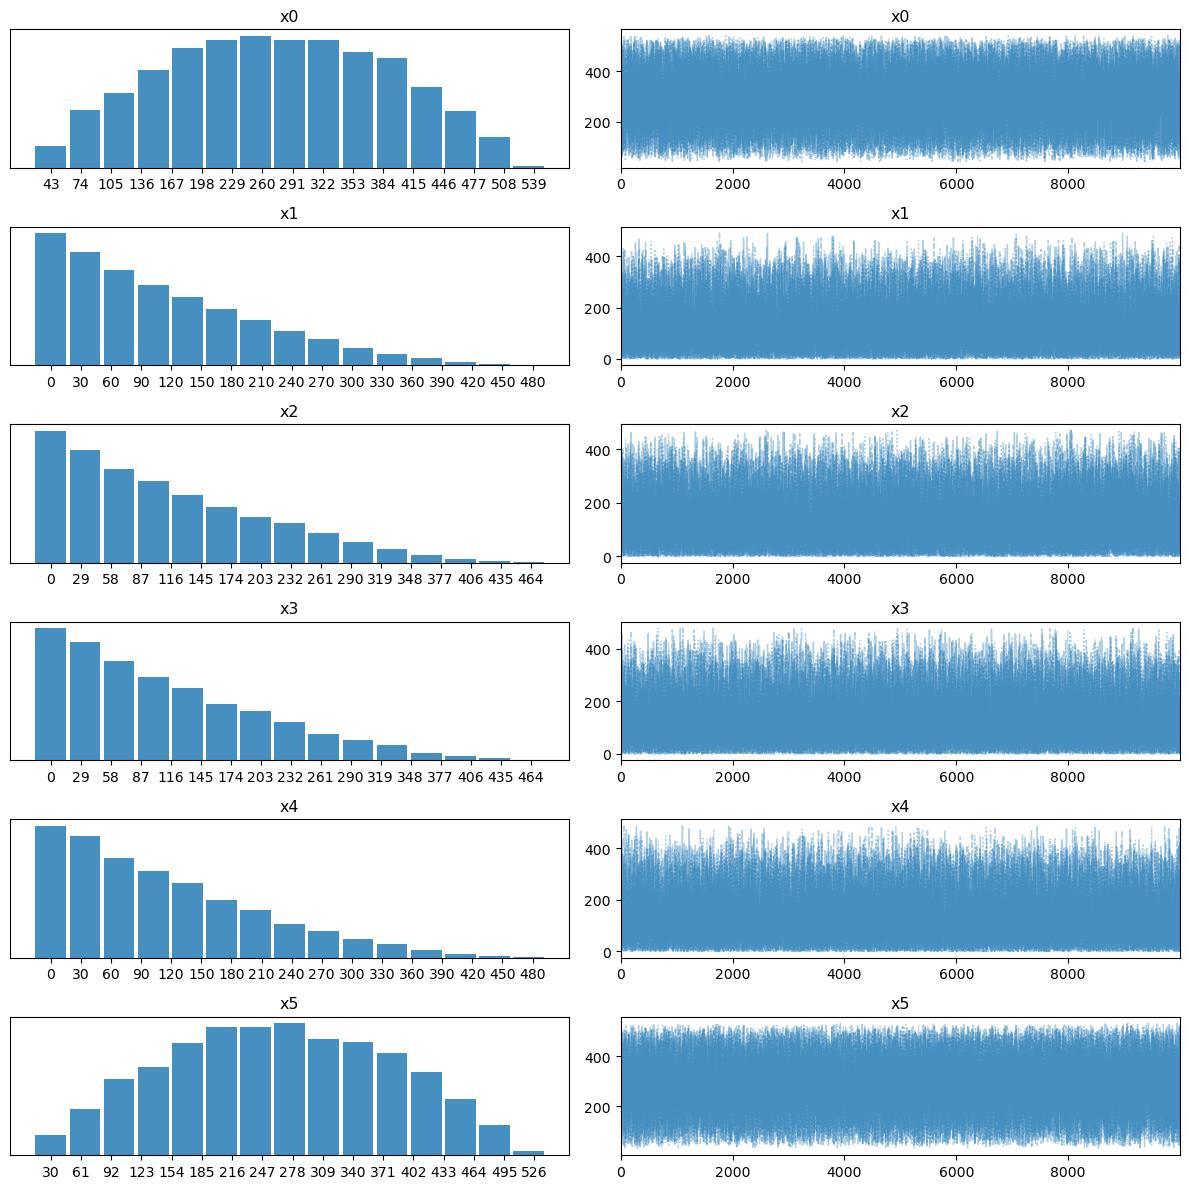

In [5]:
# Plot the posterior
az.plot_trace(trace);
plt.savefig('spur_trace_plot.png', dpi=150);

In [6]:
# Diagnosis
az.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
x0,290.777,113.452,86.0,487.0,0.577,0.408,38727.0,39609.0,1.0
x1,125.675,97.563,0.0,304.0,0.486,0.345,40498.0,39854.0,1.0
x2,126.548,98.542,0.0,308.0,0.499,0.353,39067.0,39893.0,1.0
x3,125.162,96.888,0.0,304.0,0.495,0.350,38236.0,40246.0,1.0
x4,126.614,98.033,0.0,309.0,0.493,0.349,39565.0,38380.0,1.0
x5,280.837,112.801,78.0,479.0,0.569,0.403,39174.0,39627.0,1.0


In [7]:
az.to_netcdf(trace, f'roads_spur_con_{num_con}_rf_{reduction_factor}_bits_{num_bits}_max_int_{max_int_bv}.nc')

'roads_spur_con_3_rf_2_bits_11_max_int_1023.nc'